<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-DA-MSE-data" data-toc-modified-id="Load-DA-MSE-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load DA MSE data</a></span></li><li><span><a href="#Load-training-data" data-toc-modified-id="Load-training-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load training data</a></span></li></ul></div>

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ../..

C:\Users\julia\Documents\Imperial\DA_project


In [35]:
import pickle
from notebooks import utils
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

In [36]:
fp1 ="report/figures/augmentation.png"
fp2 ="report/figures/augmentation_nosmooth.png"

### Load DA MSE data

In [37]:
fp = "experiments/TSVD/07b/final.txt"
with open(fp, 'rb') as f:
    res = pickle.load(f)

In [38]:
res

[(0.07320085952996393,
  OrderedDict([('block_type', 'NeXt'),
               ('mod', 'Tucodec'),
               ('sigmoid', False),
               ('Cstd', 64),
               ('activation', 'prelu'),
               ('aug_scheme', 2)]),
  'experiments/train2/07b/1'),
 (0.07465116493803495,
  OrderedDict([('block_type', 'NeXt'),
               ('mod', 'Tucodec'),
               ('sigmoid', False),
               ('Cstd', 64),
               ('activation', 'prelu'),
               ('aug_scheme', 4)]),
  'experiments/train2/07b/3'),
 (0.07736139195265253,
  OrderedDict([('block_type', 'NeXt'),
               ('mod', 'Tucodec'),
               ('sigmoid', False),
               ('Cstd', 64),
               ('activation', 'prelu'),
               ('aug_scheme', 1)]),
  'experiments/train2/07b/0'),
 (0.07859130053804494,
  OrderedDict([('block_type', 'NeXt'),
               ('mod', 'Tucodec'),
               ('sigmoid', False),
               ('Cstd', 64),
               ('activation', 'prel

### Load training data

In [39]:
exp_dirs = ["experiments/07b/", "experiments/DA3_2/07a/0", "experiments/DA3_2/07a/1", "experiments/07c/"]
results = utils.extract_res_from_files(exp_dirs)
for res in results:
    print(res["model_data"])

8 experiments conducted
OrderedDict([('block_type', 'NeXt'), ('mod', 'Tucodec'), ('sigmoid', False), ('Cstd', 64), ('activation', 'prelu'), ('aug_scheme', 1)])
OrderedDict([('block_type', 'NeXt'), ('mod', 'Tucodec'), ('sigmoid', False), ('Cstd', 64), ('activation', 'prelu'), ('aug_scheme', 2)])
OrderedDict([('block_type', 'NeXt'), ('mod', 'Tucodec'), ('sigmoid', False), ('Cstd', 64), ('activation', 'prelu'), ('aug_scheme', 3)])
OrderedDict([('block_type', 'NeXt'), ('mod', 'Tucodec'), ('sigmoid', False), ('Cstd', 64), ('activation', 'prelu'), ('aug_scheme', 4)])
OrderedDict([('block_type', 'NeXt'), ('mod', 'Tucodec'), ('sigmoid', False), ('Cstd', 64), ('activation', 'prelu'), ('aug_scheme', 5)])
OrderedDict([('block_type', 'NeXt'), ('mod', 'Tucodec'), ('sigmoid', False), ('Cstd', 64), ('activation', 'prelu'), ('aug_scheme', 6)])
OrderedDict([('block_type', 'NeXt'), ('mod', 'Tucodec'), ('sigmoid', False), ('Cstd', 64), ('activation', 'prelu'), ('aug_scheme', -1)])
OrderedDict([('block_ty

Plot the aug_schemes 0, 3, 4

In [40]:
aug3 = results[2]
aug4 = results[3]
aug0 = results[-1]
aug5 = results[4]
#aug6 = results[5]


In [52]:
schemes = {"0" :aug0, "1": aug3, "2": aug4, "3":aug5, } #"4": aug6}
ALPHA_TRAIN = 0.25
ALPHA_TEST = 0.25
for idx, (key, aug) in enumerate(schemes.items()):
    test_df = aug["test_df"].copy()
    train_df = aug["train_df"].copy()
    train_df["Reconstruction MSE"] = train_df["reconstruction_err"].ewm(alpha=ALPHA_TRAIN).mean()
    test_df["Reconstruction MSE"] = test_df["reconstruction_err"].ewm(alpha=ALPHA_TEST).mean()
    test_df["Subset"] = "valid"
    train_df["Subset"] = "train"
    df = pd.concat([test_df, train_df], join='outer')
    df["Aug. Strength"] = key
    df["Epoch"] = df["epoch"]
    if idx == 0:
        Dout = df
    else:
        Dout = pd.concat([df, Dout], join='outer')
Dout.head()   

#     sttn = aug["settings"]
    
#     DA_mean_DF = aug.get("DA_mean_DF")
#     print(DA_mean_DF)
#     asdas
#     model_data = aug["model_data"]
    
#     plt.plot(test_df.epoch, test_df.reconstruction_err, 'ro-')
#     plt.plot(train_df.epoch, train_df.reconstruction_err, 'g+-')
#     plt.grid(True, axis='y', )
#     plt.grid(True, axis='x', )
#     #############################
#     # multiple line plot
    
#     #ax.set_ylabel('MSE loss', color=color1)
#     #ax.tick_params(axis='y', labelcolor=color1)

    
#     #set axes:
#     if ylim1:
#         ax.set_ylim(ylim1[0], ylim1[1])

,Unnamed: 0,epoch,reconstruction_err,DA_MAE,DA_ratio_improve_MAE,time_DA(s),time_epoch(s),Reconstruction MSE,Subset,Aug. Strength,Epoch
0,0,0,174373.942893,7.08627,0.103199,0.0987284,68.692802,174373.942893,valid,3,0
1,1,10,4789.863004,0.993928,0.829993,0.0982685,68.749442,77468.754385,valid,3,10
2,2,20,2706.932379,0.632963,0.874122,0.0988579,68.666765,45139.317842,valid,3,20
3,3,30,2392.614758,0.533928,0.893253,0.099339,68.804395,29506.237857,valid,3,30
4,4,40,2495.648636,0.606749,0.88665,0.0990508,68.822462,20652.574809,valid,3,40


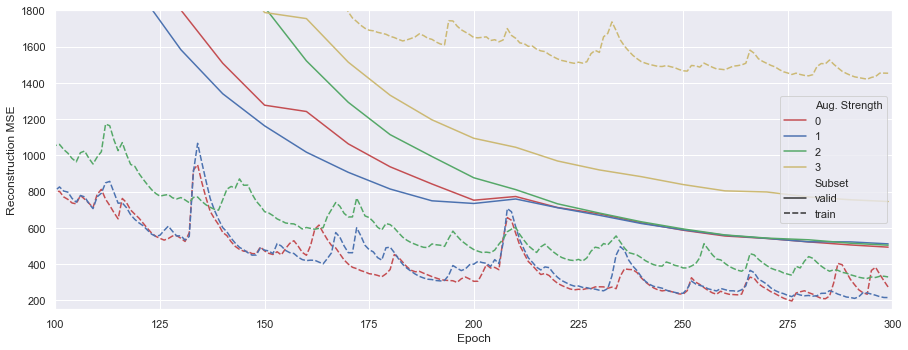

In [54]:
# Plot the responses for different events and regions

ax = sns.lineplot(x="Epoch", y="Reconstruction MSE",
             hue="Aug. Strength", style="Subset", 
             data=Dout, palette=["r", "b", 'g', "y", ])
ylim = (150, 1800)
#ylim = (None, None)
xlim = (100, 300)
#xlim = (None, None)
ax.set_ylim(ylim[0], ylim[1])
ax.set_xlim(xlim[0], xlim[1])
fig = plt.gcf()
fig.set_size_inches(15, 5.5)
fig.savefig(fp1)

caption:  
\label{fig:augmentation}Graph showing the training and validation MSE reconstruction errors during training with different strengths of augmentation. These graphs have been smoothed with an expoential moving average with $\alpha=0.4$ as the spikes in the training curves made this diagram too noisy to be useful. The non-smoothed version, and details of the specific augmentation strengths are given in Appendix \ref{appendix:augmentation}. 


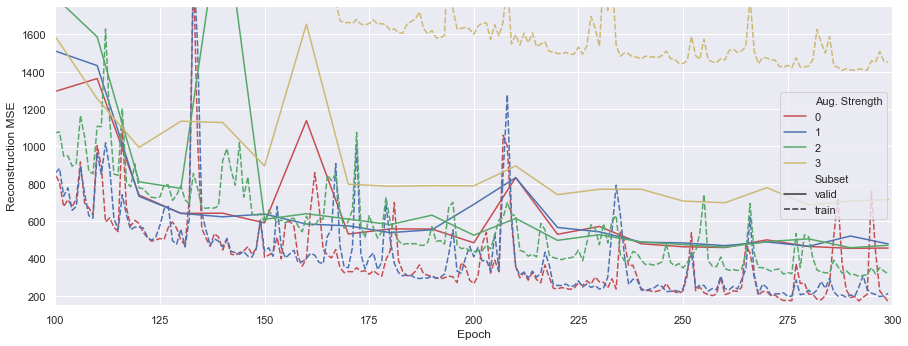

In [48]:
schemes = {"0" :aug0, "1": aug3, "2": aug4, "3":aug5, } #"4": aug6}
ALPHA_TRAIN = 1
ALPHA_TEST = 1
for idx, (key, aug) in enumerate(schemes.items()):
    test_df = aug["test_df"].copy()
    train_df = aug["train_df"].copy()
    train_df["Reconstruction MSE"] = train_df["reconstruction_err"].ewm(alpha=ALPHA_TRAIN).mean()
    test_df["Reconstruction MSE"] = test_df["reconstruction_err"].ewm(alpha=ALPHA_TEST).mean()
    test_df["Subset"] = "valid"
    train_df["Subset"] = "train"
    df = pd.concat([test_df, train_df], join='outer')
    df["Aug. Strength"] = key
    df["Epoch"] = df["epoch"]
    if idx == 0:
        Dout = df
    else:
        Dout = pd.concat([df, Dout], join='outer')
Dout.head()   


ax = sns.lineplot(x="Epoch", y="Reconstruction MSE",
             hue="Aug. Strength", style="Subset", 
             data=Dout, palette=["r", "b", 'g', 'y'])
ylim = (150, 1750)
xlim = (100, 300)

ax.set_ylim(ylim[0], ylim[1])
ax.set_xlim(xlim[0], xlim[1])
fig = plt.gcf()
fig.set_size_inches(15, 5.5)
fig.savefig(fp2)

\label{fig:aug_nosmooth}Figure \ref{fig:augmentation} repeated without exponential-moving average smoothing. The shape of the graphs are the same as previously but it is much more difficult to see macro patterns. 